# End-to-end project


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#model evaluation 
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_curve,auc



In [36]:
#load the data 
df=pd.read_csv(r'F:\Envirnoment\project1\data\heart-disease.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [37]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [38]:
df.shape

(303, 14)

In [39]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

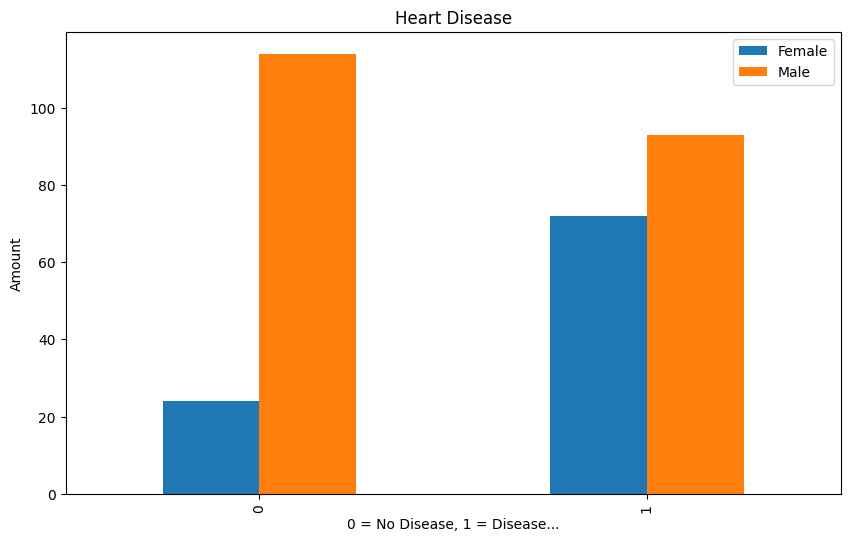

In [40]:

import pandas as pd
import matplotlib.pyplot as plt

pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 6))
plt.title("Heart Disease")
plt.xlabel("0 = No Disease, 1 = Disease...")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.show()


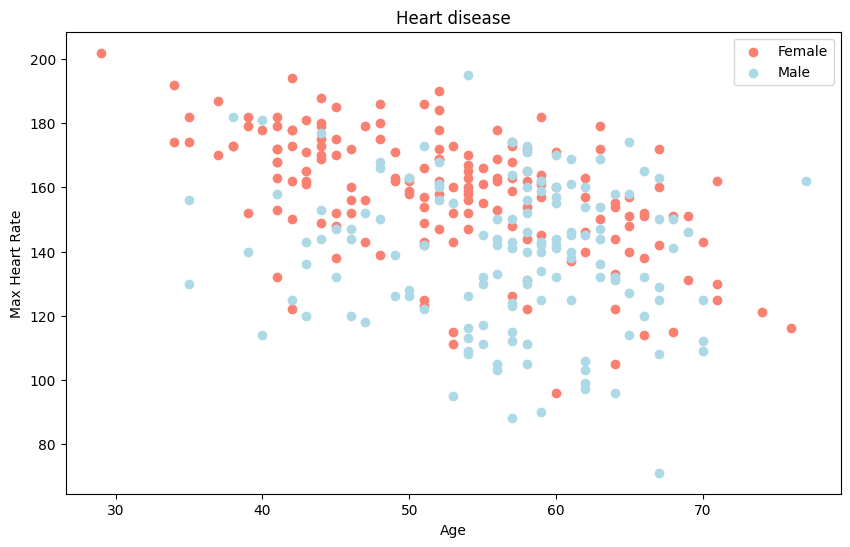

In [41]:
from turtle import color
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], color="salmon")
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], color="lightblue")
plt.title("Heart disease")
plt.xlabel('Age')  # استخدم هذه الطريقة لتعيين تسمية المحور السيني
plt.ylabel('Max Heart Rate')  # استخدم هذه الطريقة لتعيين تسمية المحور الصادي
plt.legend(["Female", "Male"])
plt.show()


<Axes: ylabel='Frequency'>

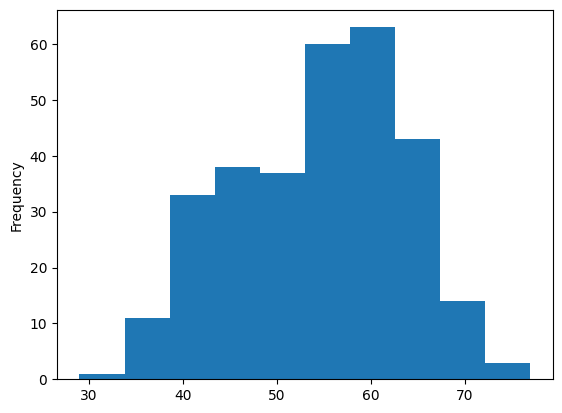

In [42]:
df.age.plot.hist()

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

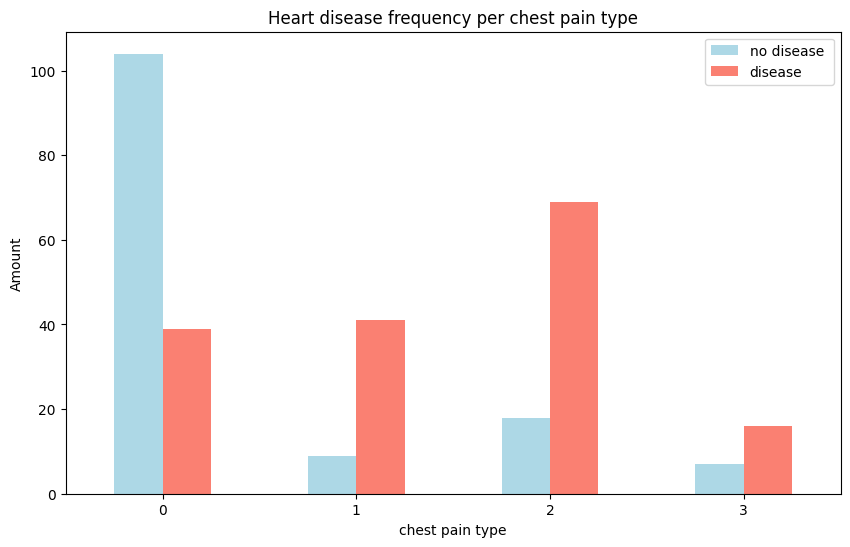

In [43]:

import pandas as pd
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=['lightblue',"salmon"])
#Add some communications 
plt.title('Heart disease frequency per chest pain type')
plt.xlabel("chest pain type")
plt.ylabel('Amount')
plt.legend(['no disease ',"disease"])
plt.xticks(rotation=0)

In [44]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


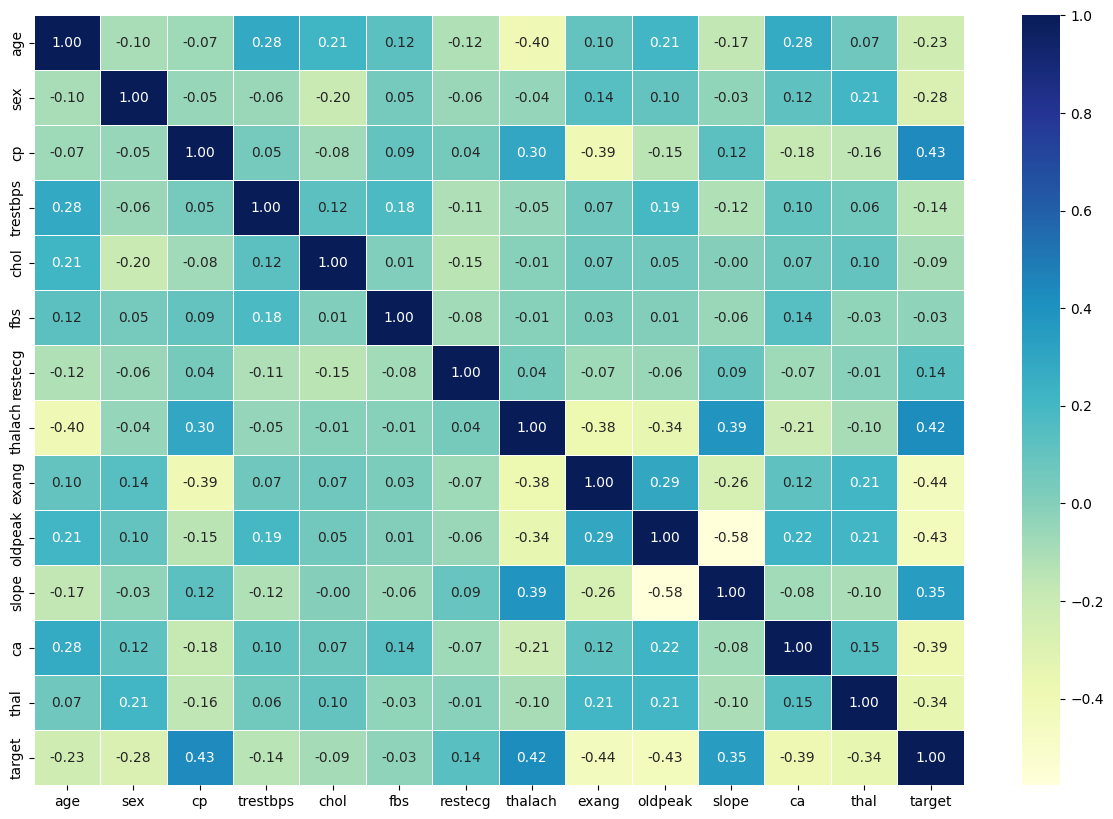

In [45]:
corr_matrix=df.corr()
fig, ax =plt.subplots(figsize=(15,10))
ax= sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap='YlGnBu')

## Modeling


In [46]:
# Split the data 
X= df.drop("target", axis = 1)
y= df["target"]

In [47]:
#Split the data to  train and test 
np.random.seed(42)
X_train,X_test,y_train , y_test =train_test_split(X,y,test_size=0.2)

In [76]:
#build a machine learning model 
models = {"Random Forest ":RandomForestClassifier(),"Logistic Regression":LogisticRegression(),"KNN":KNeighborsClassifier()}
#create a function to fit a model ;
def fit_and_score (models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    model_score={}
    for name,model in models.items():
        #fit the model to the data 
        model.fit(X_train,y_train)
        model_score[name]=model.score(X_test,y_test)
    return model_score
    
model_score

{'Random Forest ': 0.8360655737704918,
 'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344}

c:\Users\abdrh\.conda\envs\project\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

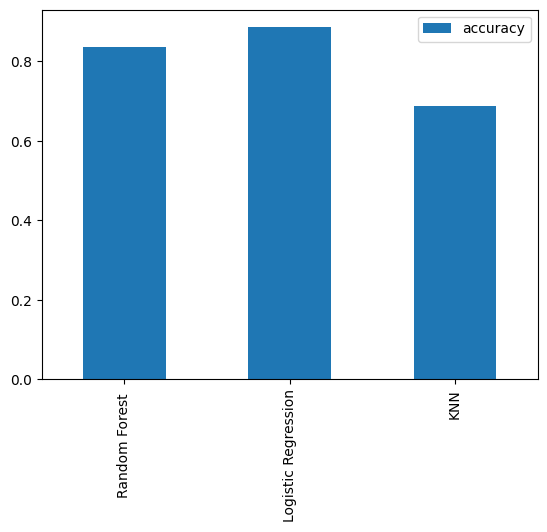

In [49]:
model_score=fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_compare=pd.DataFrame(model_score,index=["accuracy"])
model_compare.T.plot.bar()

In [50]:
models.items()

dict_items([('Random Forest ', RandomForestClassifier()), ('Logistic Regression', LogisticRegression()), ('KNN', KNeighborsClassifier())])

In [51]:
# Split the data 
X= df.drop("target", axis = 1)
y= df["target"]

## Hyperparameter tunning

In [53]:
train_scores=[]
test_scores=[]
neighbors = range(1,21)
knn= KNeighborsClassifier()
for i in neighbors :
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))


Maximum knn score on the tes data  : 75.41%


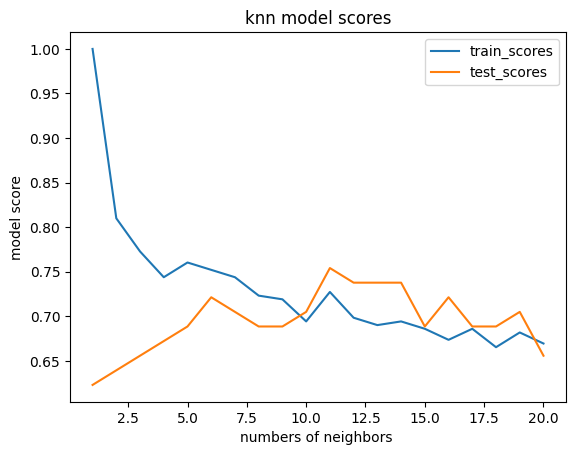

In [60]:
plt.plot(neighbors,train_scores,label="train_scores")
plt.plot(neighbors,test_scores,label="test_scores")
plt.xlabel("numbers of neighbors ")
plt.ylabel("model score")
plt.title("knn model scores")
plt.legend()
print(f"Maximum knn score on the tes data  : {max(test_scores)*100:.2f}%")

## Hyperparameter tunning Randomized search cv 


In [77]:
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}


np.random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [62]:
print(rs_log_reg.best_params_)


{'solver': 'liblinear', 'C': 0.23357214690901212}


In [81]:
np.random.seed(42)
rf_grid={"n_estimators":np.arange(10,100,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)
         
         
}

rs_rd=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)
rs_rd.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [79]:
print(rs_rd.best_params_)

{'n_estimators': 10, 'min_samples_split': 18, 'min_samples_leaf': 17, 'max_depth': 3}


In [80]:
rs_rd.score(X_test,y_test)

0.819672131147541

In [82]:
#Gridsearchcv
log_reg_grid={"C":np.logspace(-4,4,30),"solver":["liblinear"]}
Gs_grid=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)
Gs_grid.fit(X_train,y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [83]:
Gs_grid.score(X_test,y_test)

0.8852459016393442

## Evaluating models

In [84]:
y_preds=Gs_grid.predict(X_test)
y_preds


array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [85]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

Fitting 5 folds for each of 30 candidates, totalling 150 fits


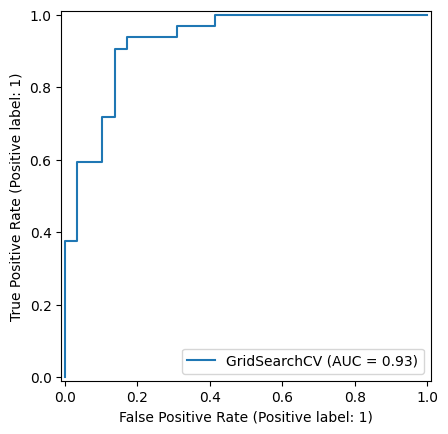

In [90]:
from sklearn.metrics import RocCurveDisplay

# تدريب النموذج
Gs_grid.fit(X_train, y_train)

# رسم منحنى ROC
RocCurveDisplay.from_estimator(Gs_grid, X_test, y_test)


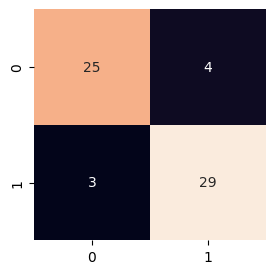

In [92]:
def plot_conf_mat (y_test,y_preds):
    fig ,ax =plt.subplots(figsize=(3,3))
    ax =sns.heatmap(confusion_matrix(y_test,y_preds) ,annot = True,
    cbar=False)
   
    
plot_conf_mat (y_test,y_preds)

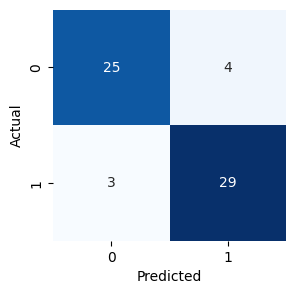

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    
    # رسم مصفوفة الارتباك باستخدام heatmap
    sns.heatmap(confusion_matrix(y_test, y_preds),
                annot=True,  # إضافة الأرقام على المصفوفة
                fmt='d',      # التنسيق كأرقام صحيحة
                cmap='Blues', # اللون الأزرق للمخطط
                cbar=False,   # إخفاء شريط الألوان
                ax=ax)        # المحور (ax)
    
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# استدعاء الدالة مع القيم الحقيقية والمتوقعة
plot_conf_mat(y_test, y_preds)


In [96]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Evaluation Matrix Using Cross- Validation

In [98]:
clf=LogisticRegression(C=0.20433597178569418, solver='liblinear')


In [101]:
#cross validated accuracy
cv_acc=cross_val_score(clf,X,y,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [105]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [103]:
#cross validated precision
cv_pre=cross_val_score(clf,X,y,scoring="precision")
cv_pre

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [ ]:
#cross validated recall
cv_recall =cross_val_score(clf,X,y,scoring="recall")
cv_recall =np.mean(cv_recall )
cv_recall

0.9212121212121213

In [108]:
#cross validated precision
cv_precision =cross_val_score(clf,X,y,scoring="precision")
cv_precision =np.mean(cv_precision )
cv_precision

0.8207936507936507

In [107]:
#cross validated recall
cv_f1 =cross_val_score(clf,X,y,scoring="f1")
cv_f1 =np.mean(cv_f1 )
cv_f1

0.8673007976269721

<Axes: title={'center': 'cross validation metrics'}>

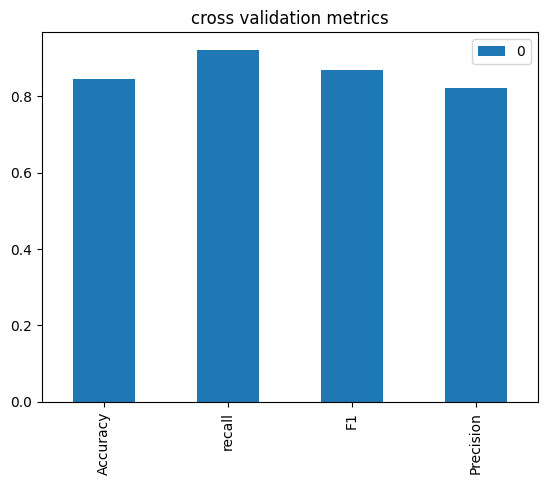

In [116]:
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,"recall":cv_recall,"F1":cv_f1,"Precision":cv_precision},index=[0])
cv_metrics.T.plot.bar(title="cross validation metrics")

In [119]:
clf=LogisticRegression(C=0.20433597178569418, solver='liblinear')
clf.fit(X_train, y_train)
featur_dict=dict(zip(df.columns,list(clf.coef_[0])))
featur_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

<Axes: title={'center': 'feature important'}>

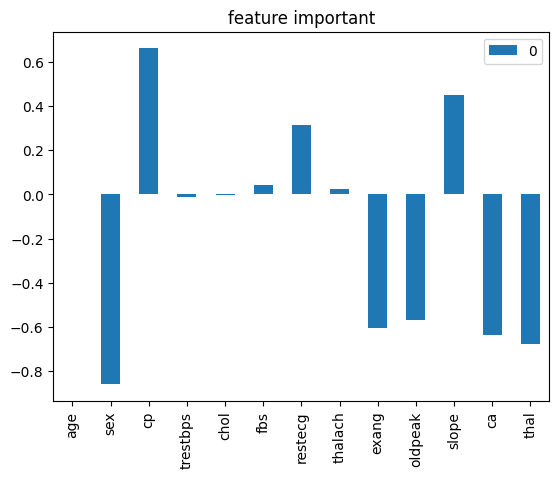

In [120]:
featur_df=pd.DataFrame(featur_dict,index=[0])
featur_df.T.plot.bar(title="feature important")
